# Importing the libraries

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

# Importing the dataset

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
!ls "/content/drive/My Drive/Colab Notebooks/cancer.csv"

'/content/drive/My Drive/Colab Notebooks/cancer.csv'


In [42]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cancer.csv')
df.replace('?', -99999, inplace=True)
df.drop(['id'], axis=1, inplace=True)

X = np.array(df.drop(['classes'], axis=1))
y = np.array(df['classes'])

# Splitting the dataset into the Training set and Test set

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principal Component Analysis (PCA)

In [45]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)  # Corrected to use transform
explained_variance = pca.explained_variance_ratio_

# Print explained variance for PCA

In [46]:
print("Explained variance by components: ", explained_variance)

Explained variance by components:  [0.57378797 0.11314738]


# Fitting KNN to the Training set


In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn_accuracies = []

for i in range(1, 21):
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model = classifier.fit(X_train, y_train)

# Predicting the Test set results

In [48]:
 y_pred = classifier.predict(X_test)

 # Making the Confusion Matrix

In [49]:
  from sklearn.metrics import confusion_matrix
  cm_KNN = confusion_matrix(y_test, y_pred)
  print(f"Confusion Matrix for K={i}:\n", cm_KNN)

Confusion Matrix for K=20:
 [[160   4]
 [  4  77]]


   # Accuracy scores

In [50]:
    train_accuracy = accuracy_score(y_train, trained_model.predict(X_train)) * 100
    test_accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Train Accuracy for K={i}: {train_accuracy:.2f}%")
    print(f"Test Accuracy for K={i}: {test_accuracy:.2f}%\n")

    knn_accuracies.append(test_accuracy)

Train Accuracy for K=20: 96.04%
Test Accuracy for K=20: 96.73%



# Plotting the accuracy for different K values

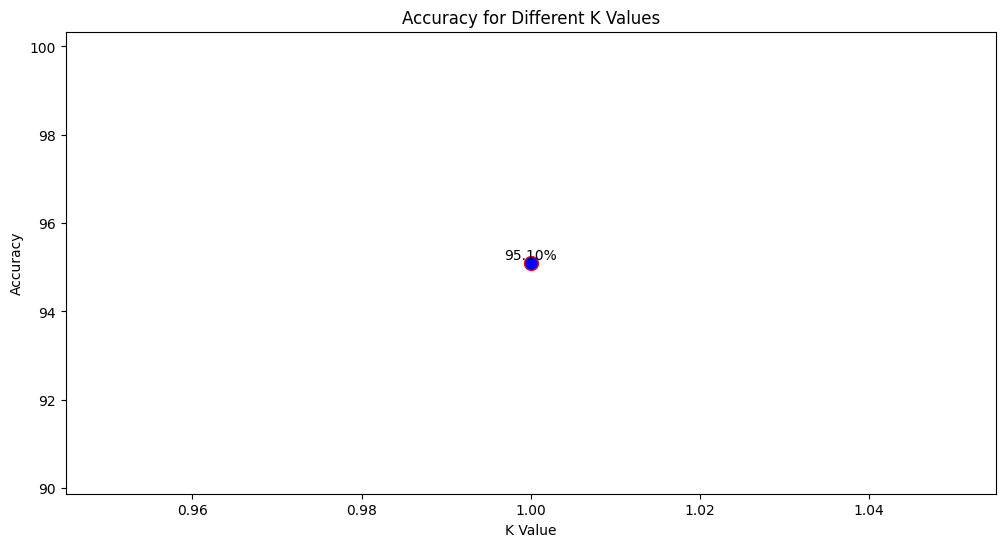

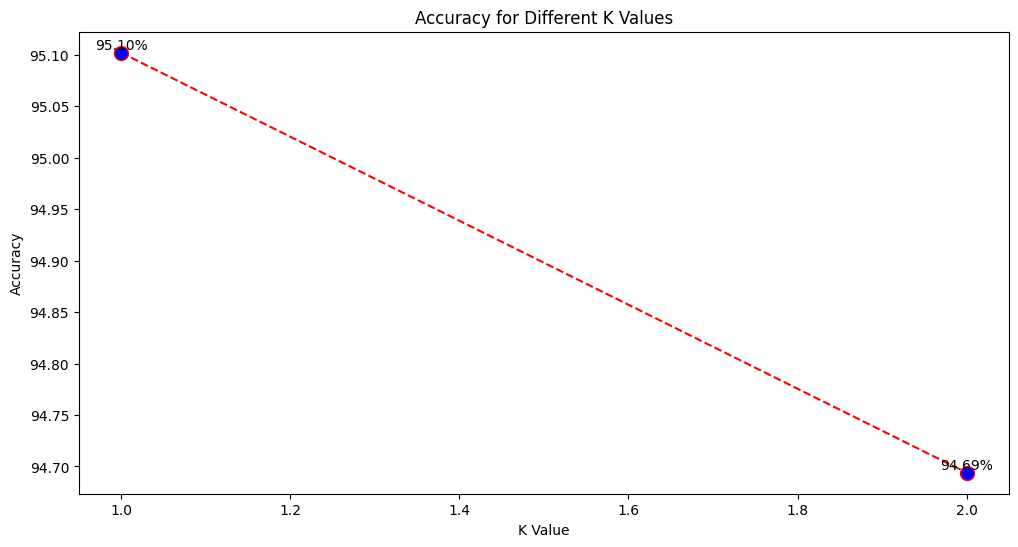

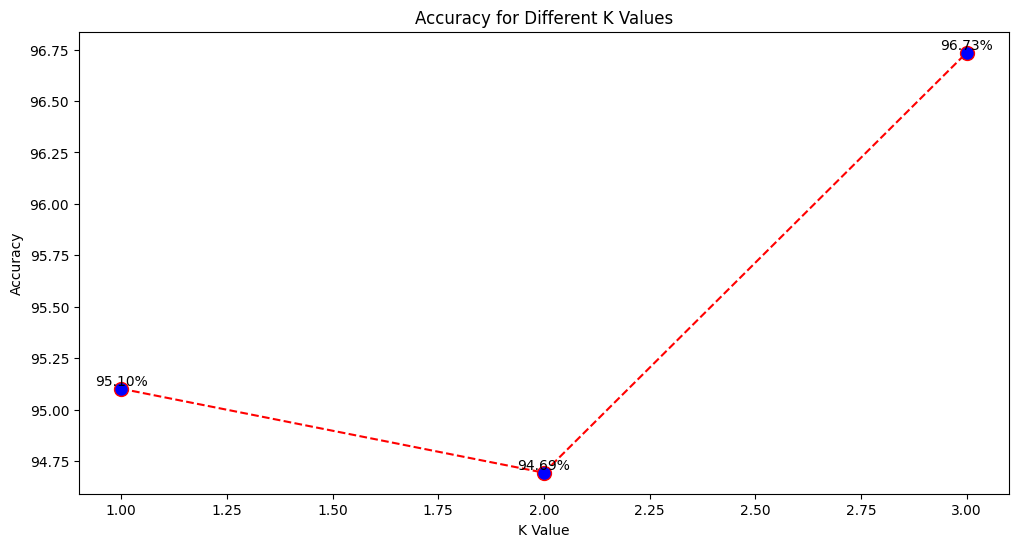

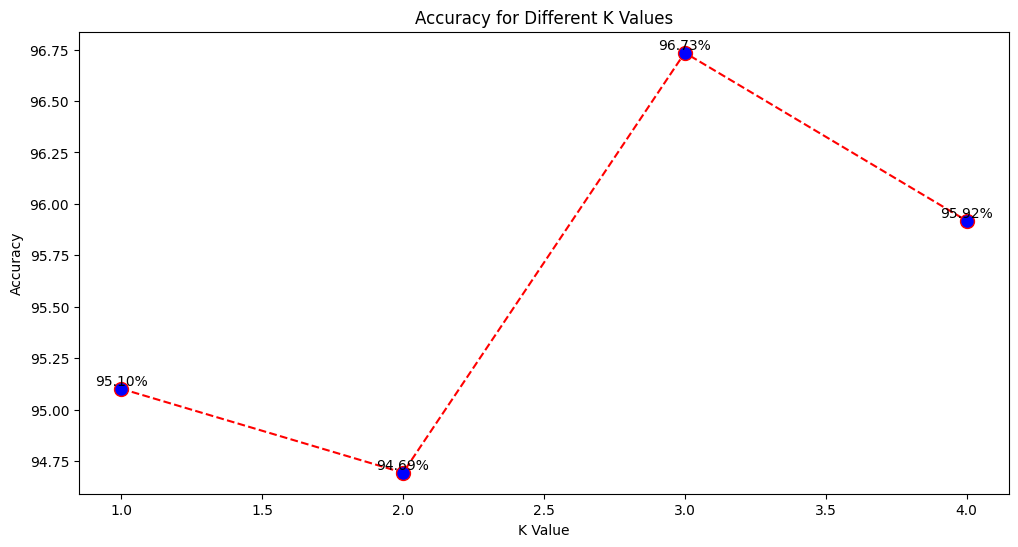

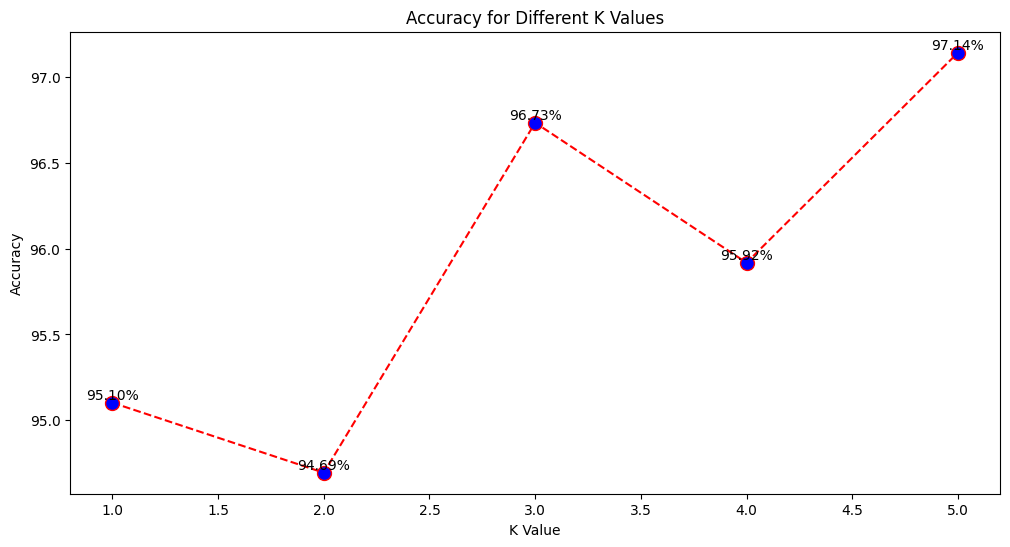

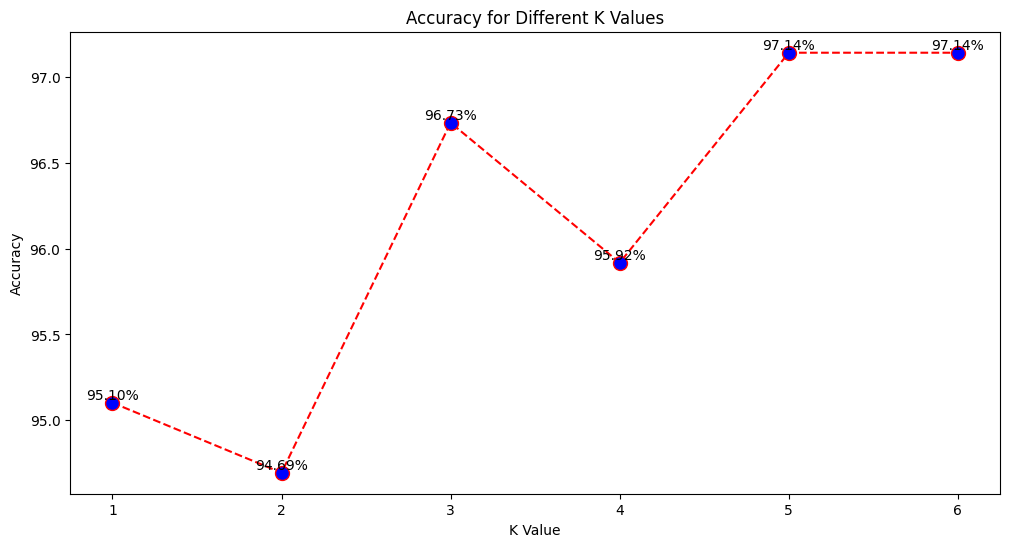

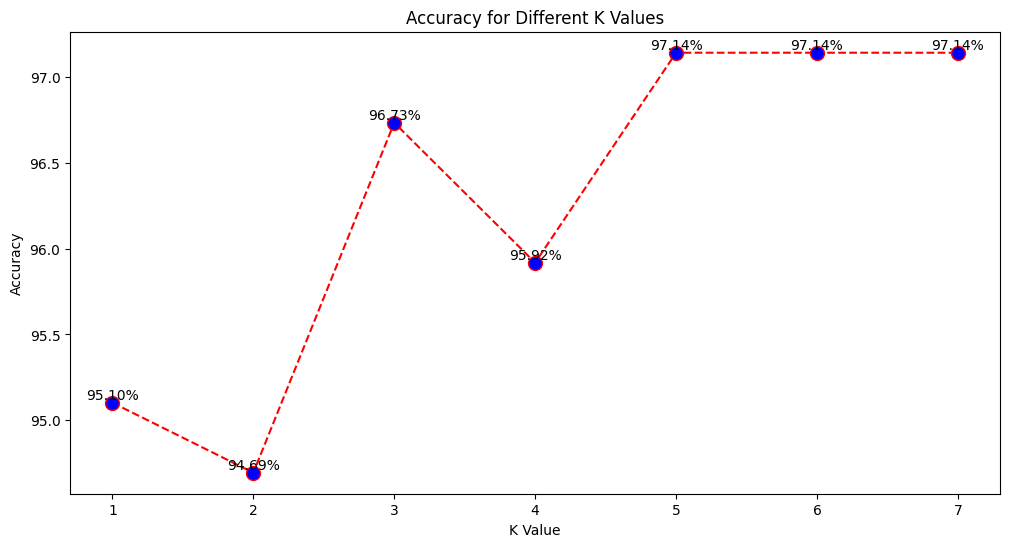

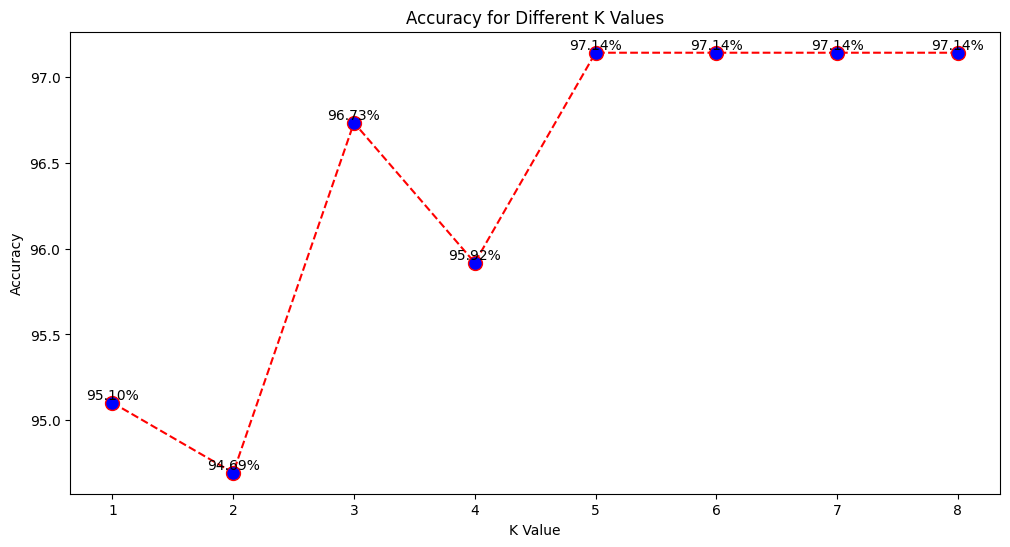

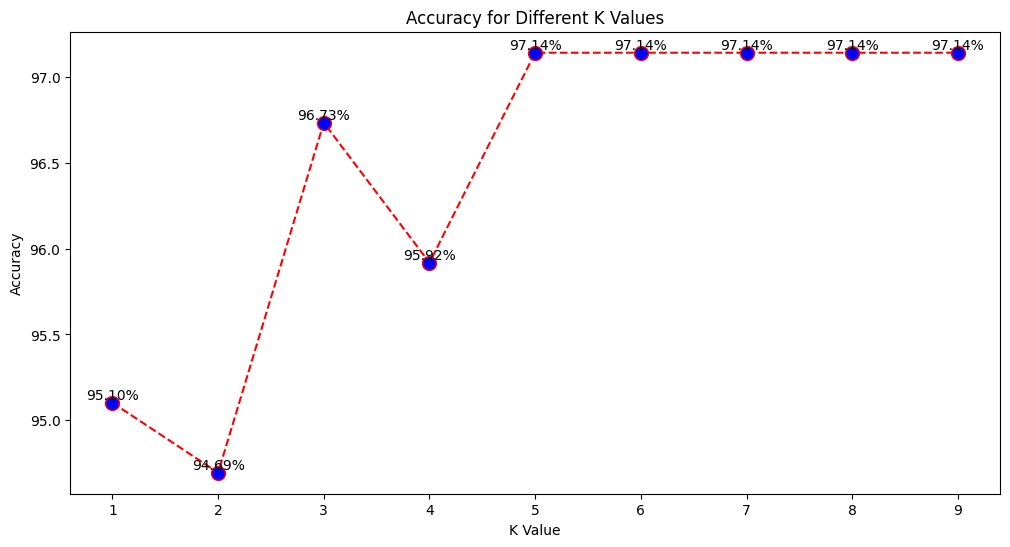

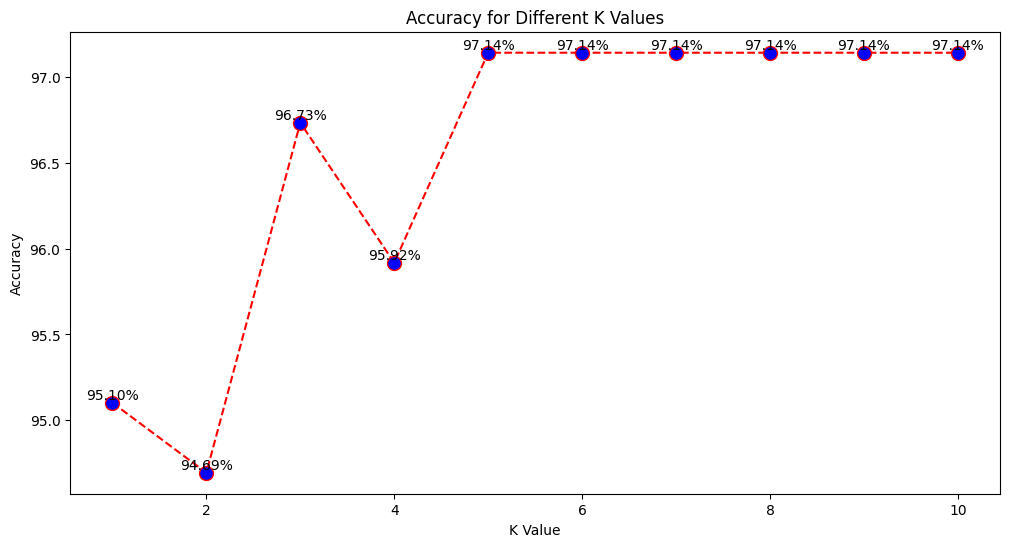

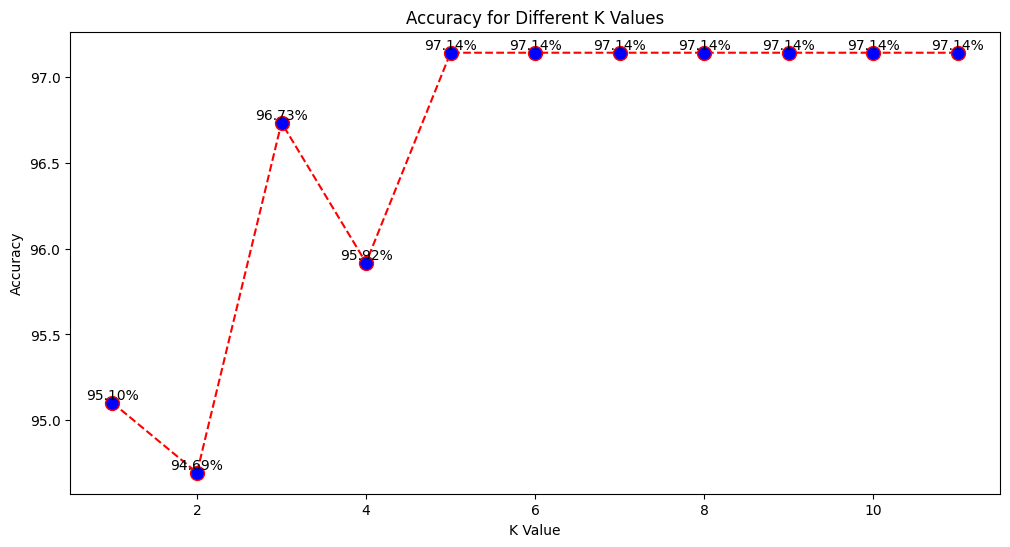

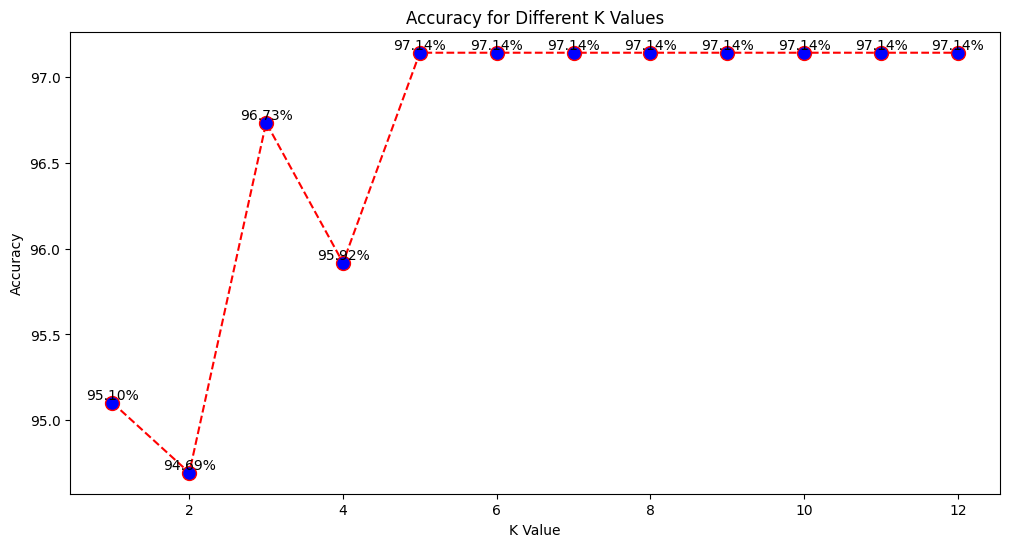

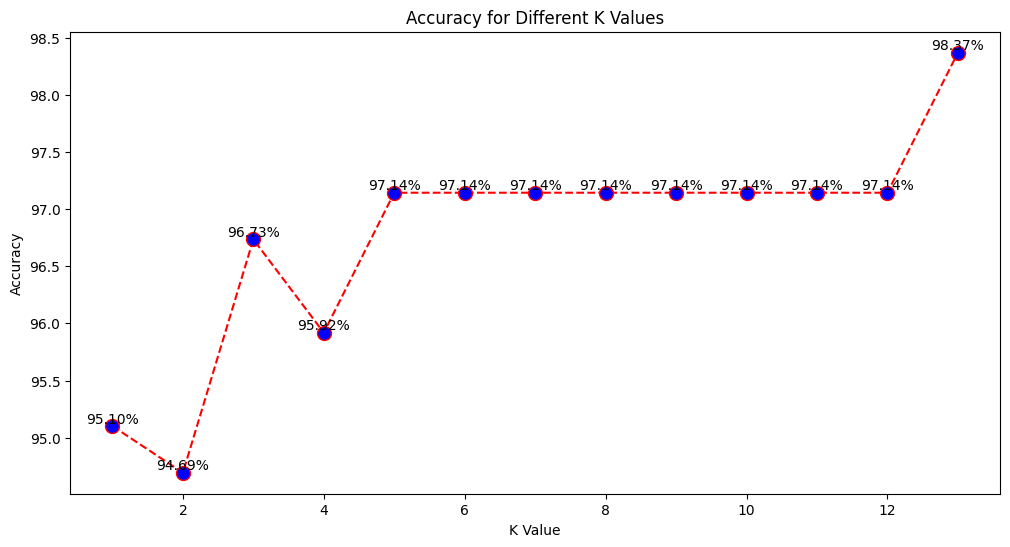

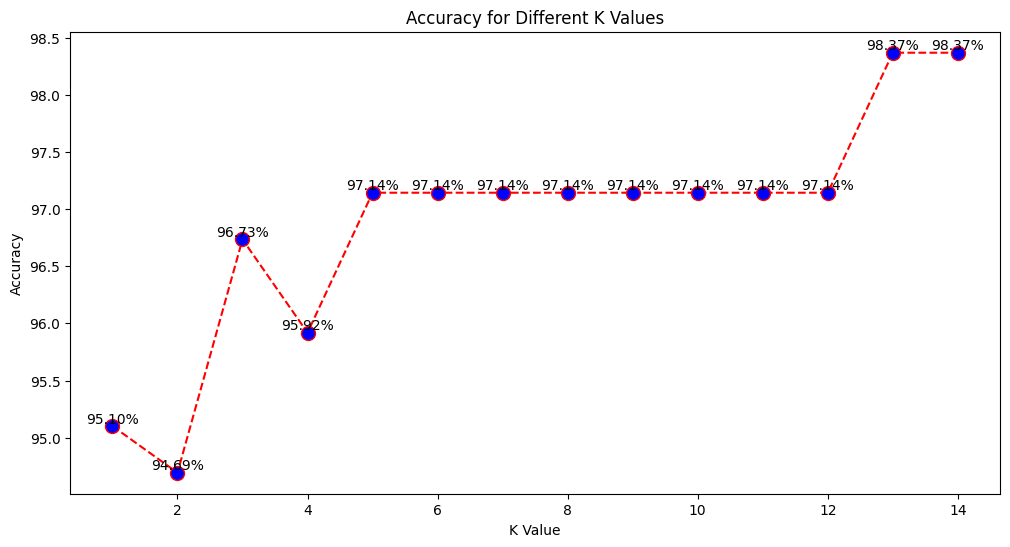

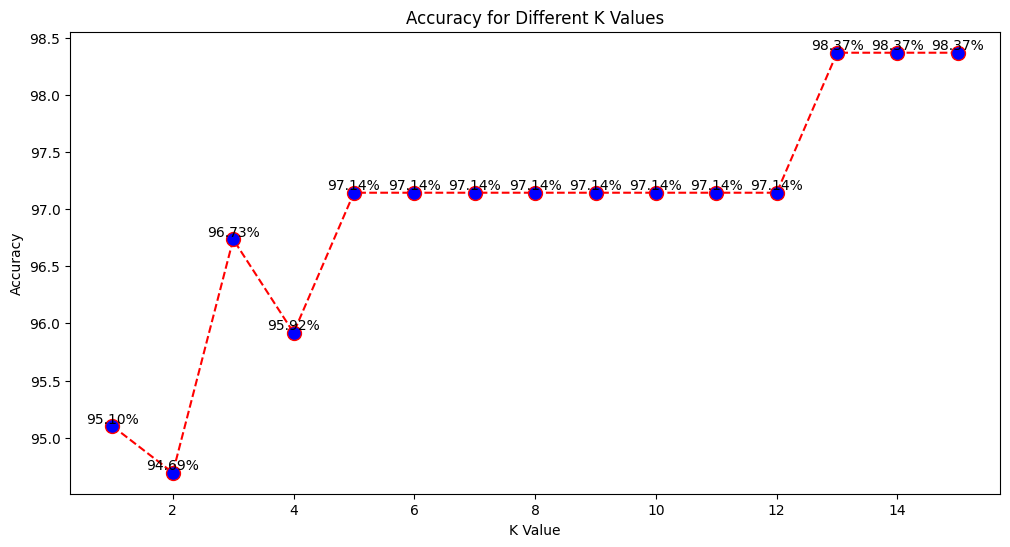

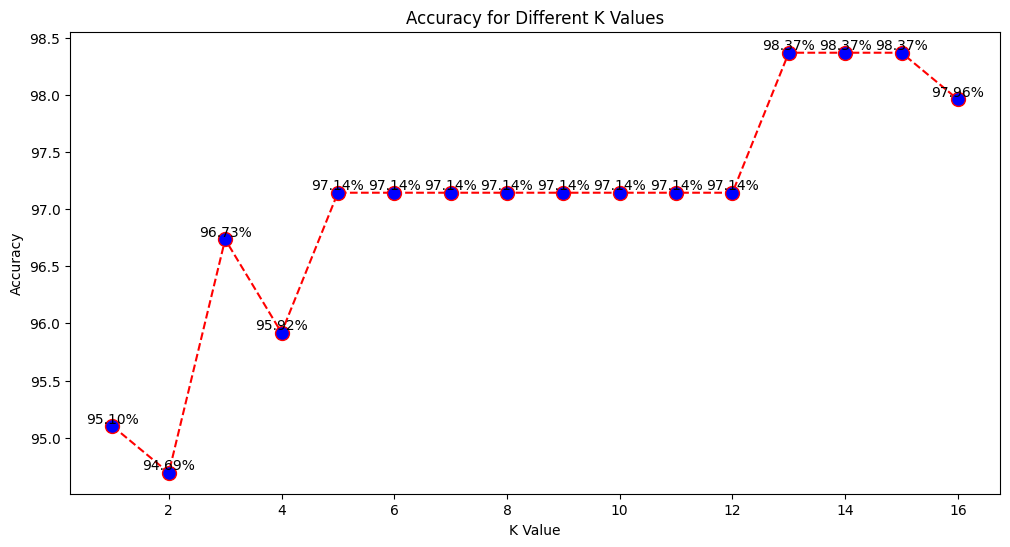

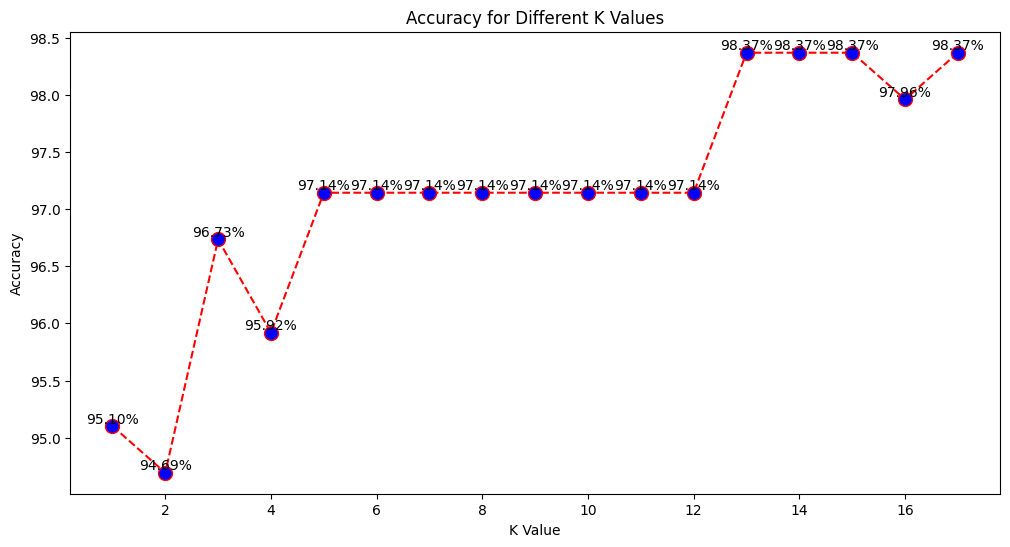

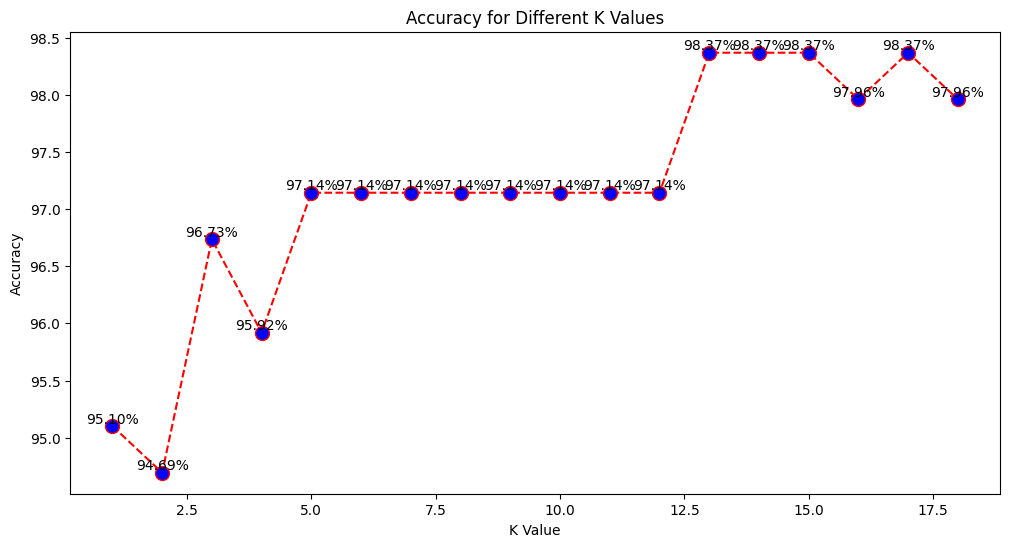

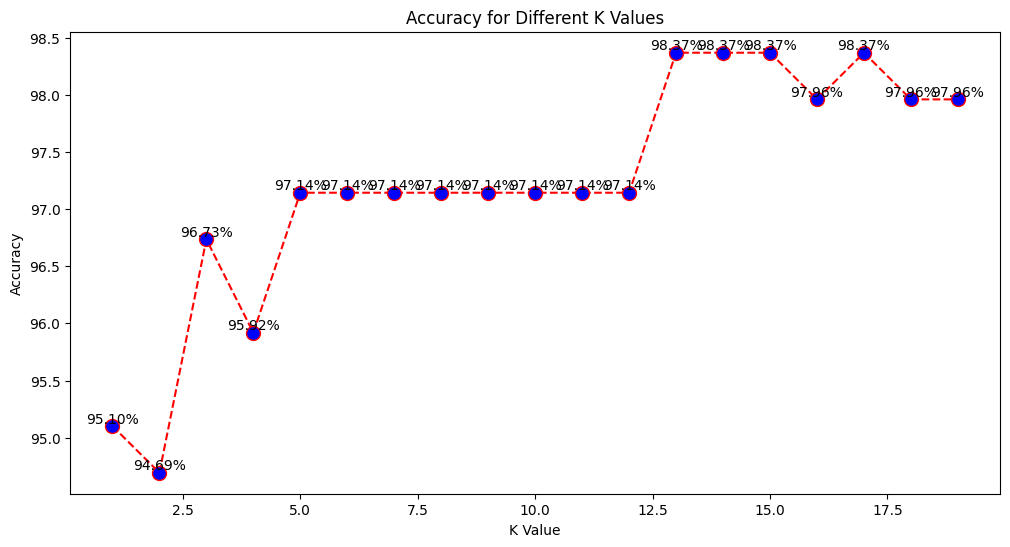

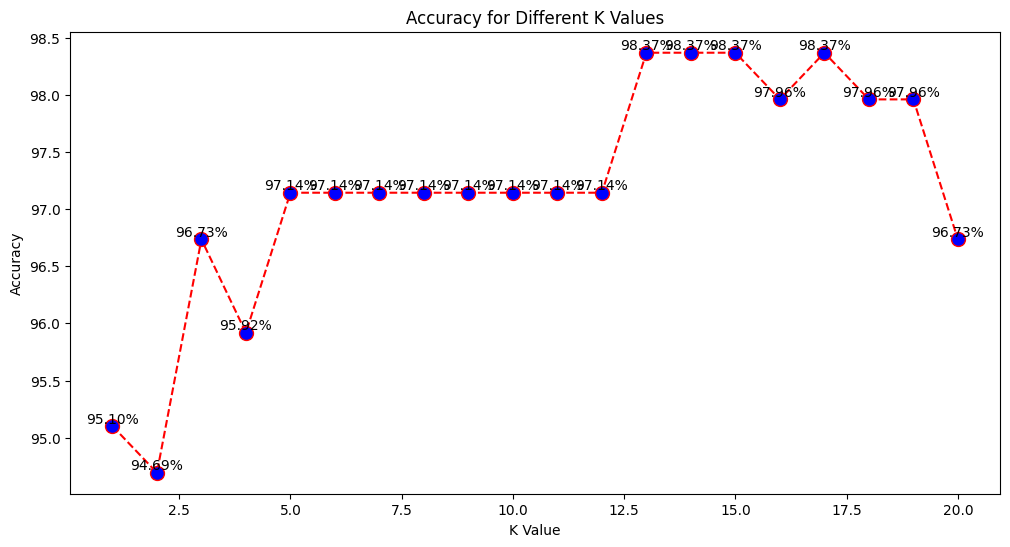

In [56]:
knn_accuracies = []  # Initialize knn_accuracies outside the loop

for i in range(1, 21):
    # Assuming classifier is trained and test_accuracy is calculated in this block
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model = classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred) * 100

    # Append the accuracy to the list
    knn_accuracies.append(test_accuracy)

    # Plot within the loop after calculating each accuracy
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, i+1), knn_accuracies, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)  # Plot up to the current i

    # Annotate each point with the accuracy value
    for j in range(i):
        plt.text(j+1, knn_accuracies[j], f'{knn_accuracies[j]:.2f}%', ha='center', va='bottom')

    plt.title('Accuracy for Different K Values')
    plt.xlabel('K Value')
    plt.ylabel('Accuracy')

    # Display the plot after each iteration
    plt.show()

# Fitting SVM to the Training set

In [52]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0)
trained_model = classifier.fit(X_train, y_train)

# Predicting the Test set results

In [53]:
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix

In [54]:
cm_SVM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix for SVM:\n", cm_SVM)

Confusion Matrix for SVM:
 [[160   4]
 [  6  75]]


# Accuracy scores for SVM

In [55]:
train_accuracy_svm = accuracy_score(y_train, trained_model.predict(X_train)) * 100
test_accuracy_svm = accuracy_score(y_test, y_pred) * 100
print(f"Train Accuracy for SVM: {train_accuracy_svm:.2f}%")
print(f"Test Accuracy for SVM: {test_accuracy_svm:.2f}%")

Train Accuracy for SVM: 96.48%
Test Accuracy for SVM: 95.92%
